# Pandas Review

## Pandas
- The industry standard in data wrangling 

## Loading Data 
In the `./data` directory, there are options:

- `metabric.csv` : Breast cancer patient treatment, tumor, and outcome data
- `va_procurement.csv` : Government spending by the state of Virginia
- `iowa.csv` : Consumer spending on alcohol in Iowa
- `ForeignGifts_edu.csv` : Foreign financial contributions to American universities
- `college_completion.csv` : Data on American university graduation rates

I am going to bounce around to illustrate ideas, but please grab one to use as we go along. They are all lightly cleaned, please don't use them for actual work and instead track down the original datasets.

- Loading data is easy: `df = pd.read_csv('./data/filename.csv')`

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/metabric.csv') # Metabric Cancer Data
idf = pd.read_csv('./data/iowa.csv') # Iowa Liquor Sales Data
vdf = pd.read_csv('./data/va_procurement.csv') # Virginia Procurement Data

## Dataframe Basics
Getting to know your data:
- `df.head(k)`/`df.tail(k)` : Look at the first/last $k$ rows of data
- `df.columns` : What are the labels of the columns
- `df.shape` : How many rows and columns?

In [12]:
print(f'Data frame shape: {df.shape}')
print(f'Data frame variables: {df.columns}')
df.head(10)

Data frame shape: (1343, 14)
Data frame variables: Index(['Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type',
       'Chemotherapy', 'Hormone Therapy', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index',
       'Overall Survival (Months)', 'Overall Survival Status', 'Radio Therapy',
       'TMB (nonsynonymous)', 'Tumor Size', 'Tumor Stage'],
      dtype='object')


,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0
5,56.45,BREAST CONSERVING,Breast Cancer,YES,YES,1.0,4.0,4.020,164.333333,0:LIVING,YES,5.230071,10.0,2.0
6,89.08,BREAST CONSERVING,Breast Cancer,NO,YES,1.0,1.0,4.058,99.533333,1:DECEASED,YES,1.307518,29.0,2.0
7,86.41,BREAST CONSERVING,Breast Cancer,NO,YES,1.0,4.0,5.032,36.566667,1:DECEASED,YES,5.230071,16.0,2.0
8,84.22,MASTECTOMY,Breast Cancer,NO,NO,0.0,5.0,3.056,36.266667,1:DECEASED,NO,6.537589,28.0,2.0
9,85.49,MASTECTOMY,Breast Cancer,NO,YES,0.0,1.0,3.044,132.033333,1:DECEASED,YES,1.307518,22.0,4.0


## Working with Variables
- `df['varname']` : Select the `varname` Column from the dataframe
- `df['varname'].describe()` : 5-number summary of `varname`
- `df['varname'].unique()` : Tabulate the unique values for `varname`
- `df['varname'].value_counts()` : Tabulate the unique values for `varname` and count their occurence


In [13]:
vdf['Order Status'].unique()

array(['Ordered', 'Canceled', 'Denied', 'Amended'], dtype=object)

In [14]:
vdf['Order Status'].value_counts()

Order Status
Ordered     93871
Canceled     1405
Amended       431
Denied        195
Name: count, dtype: int64

In [15]:
vdf['Entity Description'].value_counts()

Entity Description
University of Virginia                                 17868
Virginia Polytechnic Institute and State University    10684
Virginia Department of Transportation                   8791
Virginia Commonwealth University                        5980
George Mason University                                 4195
                                                       ...  
City of Harrisonburg                                       1
Secretary of Health and Human Resources                    1
Secretary of Labor                                         1
Mountain Empire Older Citizens                             1
Clarke County                                              1
Name: count, Length: 221, dtype: int64

## Missing Values
- `df.isna()` : Returns a Boolean whether that value is missing or not; then `np.sum(,axis=a)` to count the number of missing values
- `df['var'].fillna(x)` : Fills missing values in `var` with `x`; be careful when imputing data, since this choice can effect the results of any algorithms you run on the data
- `df.dropna()`: Drops all rows with missing values

Be careful to drop unnecessary columns before using `.dropna()`, or you'll massacre your data

## Type Coercion
- `pd.to_numeric( var, errors = 'coerce')` : Convert a 

In [16]:
vdf['Line Total'].describe()

count    9.590200e+04
mean     2.256990e+04
std      1.167073e+06
min     -9.625000e+04
25%      3.241250e+01
50%      1.342050e+02
75%      6.669800e+02
max      2.094900e+08
Name: Line Total, dtype: float64

## Sorting and Filtering
- `df.sort_values(by='varname')` : Sort the dataframe by `varname`
- `df.loc[:,list_of_vars]`: Column filtering to keep `list_of_vars`
- `df.loc[condition==True,:]`: Row filtering on `logical_condition`

In [17]:
vdf.loc[:,'Entity Description']

0        Virginia Polytechnic Institute and State Unive...
1                            Virginia Department of Energy
2                      Department of Corrections - Academy
3                                  Old Dominion University
4                                      Longwood University
                               ...                        
95897    Virginia Polytechnic Institute and State Unive...
95898                       Department of Military Affairs
95899                               University of Virginia
95900                               University of Virginia
95901                               University of Virginia
Name: Entity Description, Length: 95902, dtype: object

## Groupby
- `df.group_by('varname').method()`: Collapses the data by `varname` and applies `.method()`

In [18]:
idf.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Zip Code',
       'Category Name', 'Vendor Name', 'Item Number', 'Item Description',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)'],
      dtype='object')

In [19]:
idf['Item Description'].value_counts()

Item Description
BLACK VELVET                                 3994
HAWKEYE VODKA                                3460
TITOS HANDMADE VODKA                         2648
FIREBALL CINNAMON WHISKEY                    2500
FIVE O'CLOCK VODKA                           2013
                                             ... 
DEKUYPER SOUR APPLE PUCKER MINI                 1
PEARL ORANGE VODKA                              1
SOHO LYCHEE                                     1
SALVADORS CLASSIC MARGARITA 4PK SLIM CANS       1
1792 PORT FINISH BOURBON HA                     1
Name: count, Length: 5401, dtype: int64

## What's the most popular liquor in Iowa?
How do you go about answering that question?
- Most bottles sold?
- Most dollars spent?
- Most liquid volume sold/presumably consumed?
- ...?

<Axes: xlabel='Sale (Dollars)', ylabel='Item Description'>

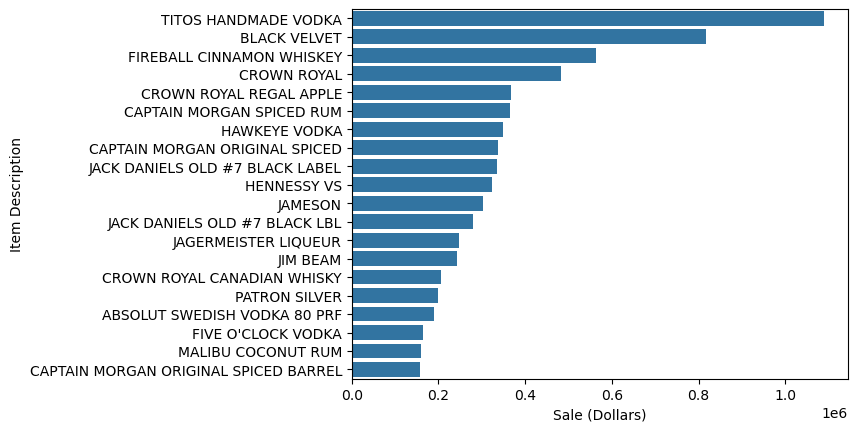

In [20]:
sales = (idf.loc[:,['Sale (Dollars)','Item Description']]
         .groupby('Item Description')
         .sum()
         .sort_values(by='Sale (Dollars)',ascending=False) )
top_sales = sales[:20]
sns.barplot(top_sales['Sale (Dollars)'], orient = 'h')

<Axes: xlabel='Bottle Volume (ml)', ylabel='Item Description'>

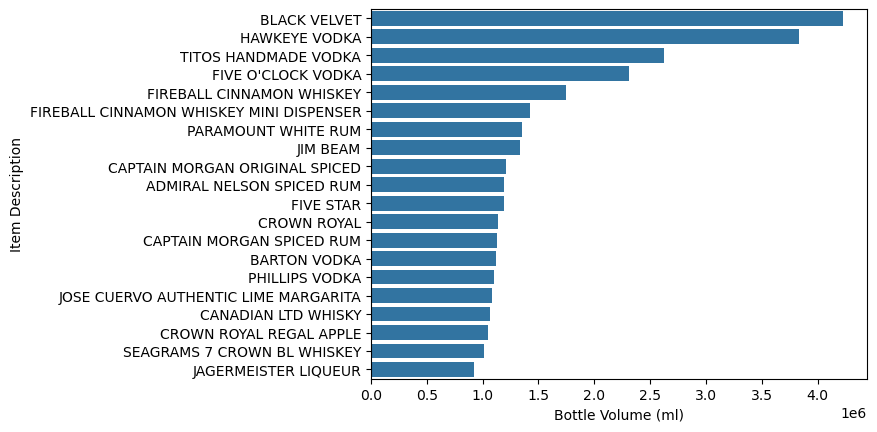

In [21]:
sales = ( idf.loc[:,['Bottle Volume (ml)','Item Description']]
         .groupby('Item Description')
         .sum()
         .sort_values(by='Bottle Volume (ml)',ascending=False))
top_sales = sales[:20]
sns.barplot(top_sales['Bottle Volume (ml)'], orient = 'h')

## Most Profitable Item?
How do we define this concept?
- Total Revenue is price times quantity
- Total Profit is (price minus cost) times quantity
- Mark-up is price minus cost

<Axes: xlabel='markup', ylabel='Density'>

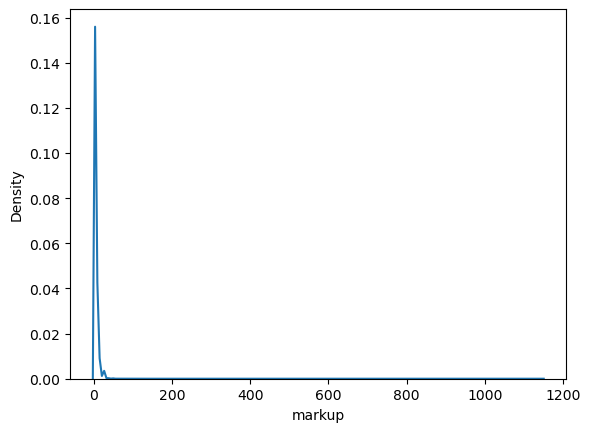

In [22]:
idf['markup'] = idf['State Bottle Retail'] - idf['State Bottle Cost']
sns.kdeplot(idf['markup'])

## Non-Linear Transformations
- Sometimes, variables are **badly scaled**: They have few extremely high or low values, and this makes visualization and stable computation a challenge
- You have at least three options:
    1. Truncate: Drop all the values above a threshold
    2. Winsorize: For all values above a threshold, reduce them to the value of the threshold
    3. Take logs: Transform by natural logarithm
    4. Inverse hyperbolic sine (arcsinh): Transform by arcsinh

My person preference is roughly 4>3>2>1.

/home/trj/miniconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/trj/miniconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='markup', ylabel='Density'>

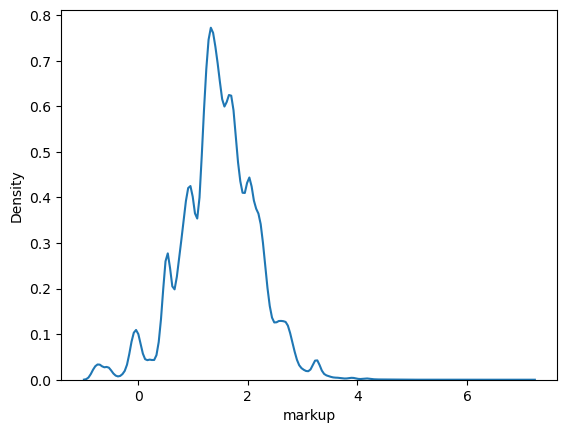

In [23]:
# Log transformation
x = np.log( idf['markup'] )
sns.kdeplot(x)

<Axes: xlabel='markup', ylabel='Density'>

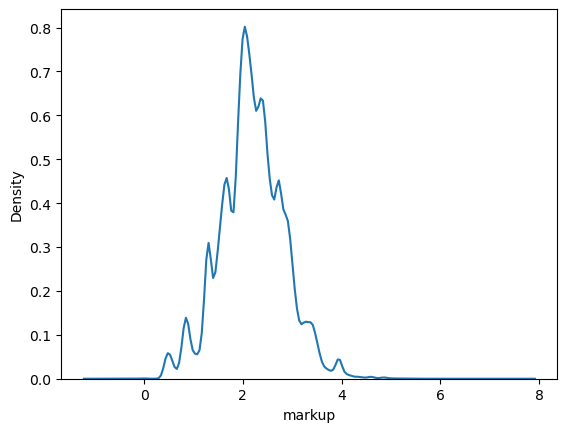

In [24]:
x =  np.arcsinh(idf['markup'])
sns.kdeplot(x)

<Axes: xlabel='markup', ylabel='Density'>

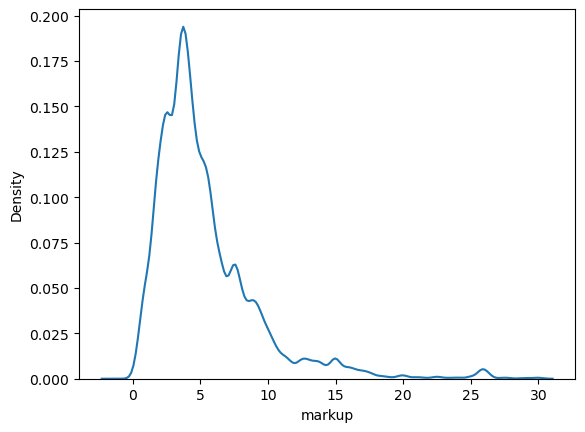

In [25]:
x = idf['markup'].copy() # Why copy?
x[ x> 30] = np.nan
sns.kdeplot(x)

<Axes: xlabel='markup', ylabel='Density'>

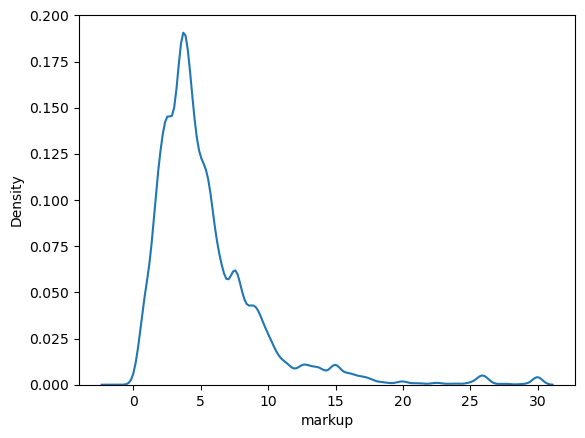

In [26]:
x = idf['markup'].copy() # Why copy?
x[ x> 30] = 30
sns.kdeplot(x)

## Exercise:
- In your groups, pick one of the datasets (Iowa liquor sales, METABRIC breast cancer, Minnesota use of force, or Virginia procurement) and get to know it

# Basic Plots

## Basic Plots
Some basic visualization tools are really helpful when inspecting data:
- Boxplot: Gives a 5-number summary of a variable (min, 25th percentile, median, 75th percentile, max) and illustrates outliers, `df['var'].plot.boxplot`
- Histogram: Places the data in fixed-width bins in order to visualize concentraction of values, `df.plot.hist()`
- Scatterplot: Plots a sequence $(x_t,y_t)$

<Axes: >

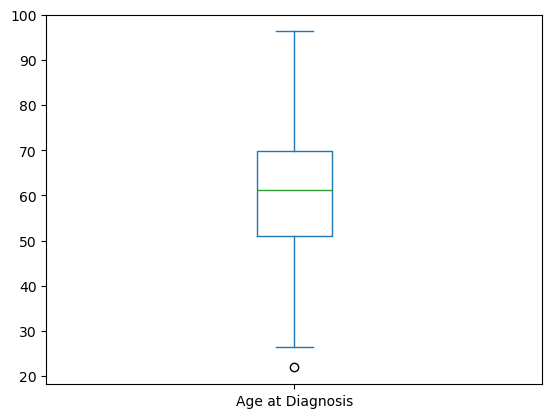

In [32]:
df['Age at Diagnosis'].plot.box()

<Axes: ylabel='Frequency'>

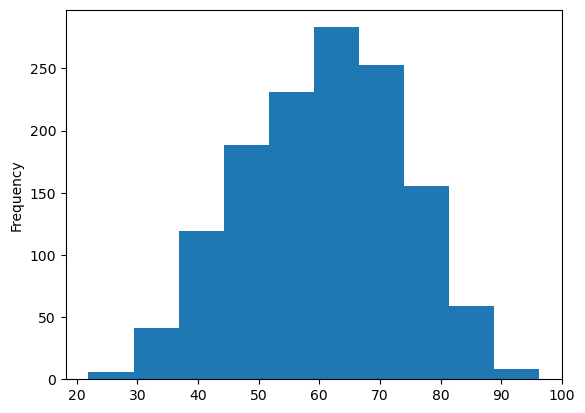

In [33]:
df['Age at Diagnosis'].plot.hist()

<Axes: xlabel='Age at Diagnosis', ylabel='Overall Survival (Months)'>

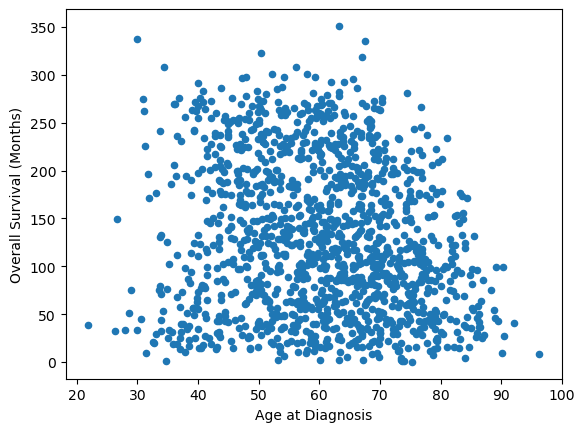

In [38]:
df.plot.scatter(x='Age at Diagnosis', y='Overall Survival (Months)')

## Next Steps

This is just a primer. We'll revisit Pandas often, especially when you're wrangling features, preparing inputs for models, or diving into visual EDA.
